In [21]:
import pandas as pd
from data_split import *

In [22]:
split_ratio = [.8, .1, .1]
train_vals_loc = "../../Data/raw/dengue_features_train.csv"
train_labels_loc = "../../Data/raw/dengue_labels_train.csv"
submit_data_loc = "../../Data/raw/dengue_features_test.csv"
interim_loc = "../../Data/interim/"

PRIMARY_KEY = "pk" 
#Combine the values with their labels
#not needed if data
train_vals_df = pd.read_csv(train_labels_loc)
train_features_df = pd.read_csv(train_vals_loc)
submit_features_df = pd.read_csv(submit_data_loc)
df_list = [train_features_df, train_vals_df, submit_features_df]
for df in df_list:
    gen_primary_key(df, cols_to_combine=["city", "year", "weekofyear"], primary_key_name=PRIMARY_KEY)

whole_df = combine_vals_labels(train_features_df, train_vals_df, PRIMARY_KEY)

In [26]:
whole_df.head()
#TODO: Take Whole df, and get rid of everything that is not an int or a float (one-hot encode or just ditch it)

,city_x,year_x,weekofyear_x,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_y,year_y,weekofyear_y,total_cases
pk,,,,,,,,,,,,,,,,,,,,,,,,,,,,
sj_1990_18,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,sj,1990,18,4
sj_1990_19,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,sj,1990,19,5
sj_1990_20,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,sj,1990,20,4
sj_1990_21,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,sj,1990,21,3
sj_1990_22,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,sj,1990,22,6


In [50]:
working = whole_df.copy()

#shows all rows and col names instead of '...' when using df.head()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


#make dummies from city name strings
city_dummy = pd.get_dummies(working['city_x'])

#merge dummies with working df
working = pd.merge(city_dummy, working_copy, on='pk')

#drop unnecessary columns
working.drop(['city_x', 'city_y', 'year_y', 'weekofyear_y'], axis=1, inplace=True)

#year and week are same for labels and features so rename after dropping the unnecessary y year and week columns
working.rename(columns={"year_x": "year", "weekofyear_x": "weekofyear"}, inplace = True)
working.head()

,iq,sj,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
pk,,,,,,,,,,,,,,,,,,,,,,,,,,
sj_1990_18,0,1,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
sj_1990_19,0,1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
sj_1990_20,0,1,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
sj_1990_21,0,1,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
sj_1990_22,0,1,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [51]:
#get rid of NaNs by filling from above rows
working = working.ffill(axis=0)

In [52]:
#save the working with no NaN df
working_no_NaN = working.copy()

## some visualization

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

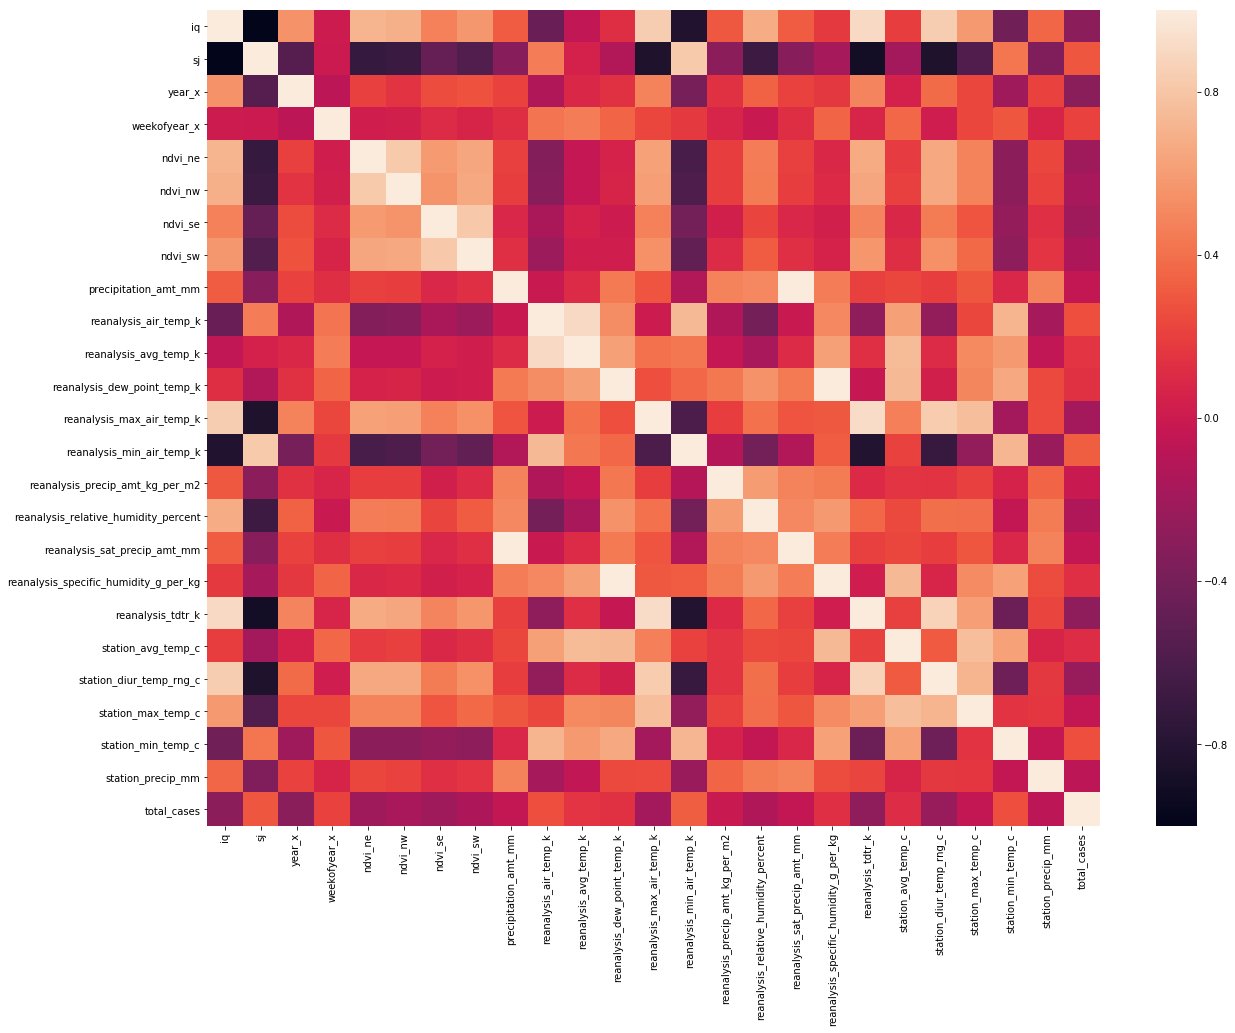

In [45]:
plt.subplots(figsize=(20,15))
sns.heatmap(working.corr())

Total cases correlates closer with:
    reanalysis_min_air_temp_k, 
    reanalysis_air_temp_k, 
    station_min_temp_c, 
    weekofyear_x, 
    reanalysis_specific_humidity_g_per_kg,
    reanalysis_dew_point_temp_k,
    reanalysis_avg_temp_k
    
Negative correlation with:
    reanalysis_tdtr_k,
    station_diur_temp_mg_c
    reanalyis_max_air_temp_k
    rdvi_se

# Lag process
- split iq and sj
- new 'VAR_lag_#' column with appropriate lag
- fill NaNs based on city, week average

In [53]:
try_lag = working.copy()

In [54]:
#separate sj and iq
try_lag.head()


,iq,sj,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
pk,,,,,,,,,,,,,,,,,,,,,,,,,,
sj_1990_18,0,1,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
sj_1990_19,0,1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
sj_1990_20,0,1,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
sj_1990_21,0,1,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
sj_1990_22,0,1,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [59]:
#split df by row based on dummy for city

try_lag_iq = try_lag[try_lag.iq == 1]
try_lag_iq.head()

try_lag_sj = try_lag[try_lag.sj == 1]
try_lag_sj.head()

,iq,sj,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
pk,,,,,,,,,,,,,,,,,,,,,,,,,,
sj_1990_18,0,1,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
sj_1990_19,0,1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
sj_1990_20,0,1,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
sj_1990_21,0,1,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
sj_1990_22,0,1,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


## try a 2, 4, 6, and 8 week shift

In [76]:
try_lag_sj_working = try_lag_sj.copy()
lags = [2, 4, 6, 8]
lagged_columns = [
                "reanalysis_min_air_temp_k", 
                "reanalysis_air_temp_k", 
                "station_min_temp_c",
                "reanalysis_specific_humidity_g_per_kg",
                "reanalysis_dew_point_temp_k",
                "reanalysis_avg_temp_k",
                "reanalysis_tdtr_k",
                "station_diur_temp_rng_c",
                "reanalysis_avg_temp_k",
                "reanalysis_max_air_temp_k"
                 ]

for column in lagged_columns:
    for lag in lags:
        try_lag_sj_working[column + '_lag_' + str(lag)] = try_lag_sj_working[column].shift(lag)


try_lag_sj_working.head(10)

,iq,sj,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,reanalysis_min_air_temp_k_lag_2,reanalysis_min_air_temp_k_lag_4,reanalysis_min_air_temp_k_lag_6,reanalysis_min_air_temp_k_lag_8,reanalysis_air_temp_k_lag_2,reanalysis_air_temp_k_lag_4,reanalysis_air_temp_k_lag_6,reanalysis_air_temp_k_lag_8,station_min_temp_c_lag_2,station_min_temp_c_lag_4,station_min_temp_c_lag_6,station_min_temp_c_lag_8,reanalysis_specific_humidity_g_per_kg_lag_2,reanalysis_specific_humidity_g_per_kg_lag_4,reanalysis_specific_humidity_g_per_kg_lag_6,reanalysis_specific_humidity_g_per_kg_lag_8,reanalysis_dew_point_temp_k_lag_2,reanalysis_dew_point_temp_k_lag_4,reanalysis_dew_point_temp_k_lag_6,reanalysis_dew_point_temp_k_lag_8,reanalysis_avg_temp_k_lag_2,reanalysis_avg_temp_k_lag_4,reanalysis_avg_temp_k_lag_6,reanalysis_avg_temp_k_lag_8,reanalysis_tdtr_k_lag_2,reanalysis_tdtr_k_lag_4,reanalysis_tdtr_k_lag_6,reanalysis_tdtr_k_lag_8,station_diur_temp_rng_c_lag_2,station_diur_temp_rng_c_lag_4,station_diur_temp_rng_c_lag_6,station_diur_temp_rng_c_lag_8,reanalysis_max_air_temp_k_lag_2,reanalysis_max_air_temp_k_lag_4,reanalysis_max_air_temp_k_lag_6,reanalysis_max_air_temp_k_lag_8
pk,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
sj_1990_18,0,1,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sj_1990_19,0,1,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sj_1990_20,0,1,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4,295.9,NaN,NaN,NaN,297.572857,NaN,NaN,NaN,20.0,NaN,NaN,NaN,14.012857,NaN,NaN,NaN,292.414286,NaN,NaN,NaN,297.742857,NaN,NaN,NaN,2.628571,NaN,NaN,NaN,6.900000,NaN,NaN,NaN,299.8,NaN,NaN,NaN
sj_1990_21,0,1,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3,296.4,NaN,NaN,NaN,298.211429,NaN,NaN,NaN,22.2,NaN,NaN,NaN,15.372857,NaN,NaN,NaN,293.951429,NaN,NaN,NaN,298.442857,NaN,NaN,NaN,2.371429,NaN,NaN,NaN,6.371429,NaN,NaN,NaN,300.9,NaN,NaN,NaN
sj_1990_22,0,1,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6,297.3,295.9,NaN,NaN,298.781429,297.572857,NaN,NaN,22.8,20.0,NaN,NaN,16.848571,14.012857,NaN,NaN,295.434286,292.414286,NaN,NaN,298.878571,297.742857,NaN,NaN,2.300000,2.628571,NaN,NaN,6.485714,6.900000,NaN,NaN,300.5,299.8,NaN,NaN
sj_1990_23,0,1,1990,23,1990-06-04,0.196200,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,2,297.0,296.4,NaN,NaN,298.987143,298.211429,NaN,NaN,23.3,22.2,NaN,NaN,16.672857,15.372857,NaN,NaN,295.310000,293.951429,NaN,NaN,299.228571,298.442857,NaN,NaN,2.428571,2.371429,NaN,NaN,6.771429,6.371429,NaN,NaN,301.4,300.9,NaN,NaN
sj_1990_24,0,1,1990,24,1990-06-11,0.112900,0.0928

## replace the NaNs

In [ ]:
##psudocode  Doesn't run...

for column in try_lag_sj_working.columns:
    for /iterate through rows in search of value:
        if NaN value:
            important_week = that week (using pk i think?)
            fill_sum = 0
            count_of_weeks_added = 0
            for row in df:
                if week = important_week:
                    fill_sum += value_of_col_with NaN
                    count_of_weeks_added += 1
            replace NaN value with fill_sum / count_of_weeks_added